In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation

In [2]:
# import Particle Swarm Optimization algorithm
from PSO_algo import Particle
from PSO_algo import PSO

### Description
The number of pneumococcus serotypes reported in Denmark is $33$, and the ratio $I/D$ of single to co-colonization is $\mu = 10.23$. We need to estimate the matrix $33 \times 33$ $\left(\alpha_{ij}\right)$ of Denmark. \
Since $\mu$ of Denmark is large, we estimate parameters such that the data observation (Denmark serotype abundances) is the solution of the replicator dynamics at time $\tau =50$ with the same frequencies for all initial values $z_N(0)$, $1 \leq N \leq 33$. \
i) First, from $\alpha_{ij}$'s estimated from Brazil, we insert as fixed the $\alpha_{ij}$'s values already estimated for the serotype pairs common between the two sites. \
ii) Then we apply the PSO algorithm in the range $\left[-10, 10\right]$ to estimate the remaining $738$ $\alpha_{ij}$'s such that the error between data observation $z^*_{\text{Denmark}}$ and the solution of replicator dynamics (corresponding to $\Lambda$ matrix calculated from $\left(\alpha_{ij}\right)$) at time $\tau =50$ $\mathbf{z}(50)$ attains as low value as possible. \
There are $833$ $\alpha_{ij}$'s estimated.

In [4]:
# data observation from 5 countries
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

# import name of serotypes and their frequencies from Denmark
strain_number = len(Denmark.strain)
Denmark_strain = np.array(Denmark.strain)
Denmark_cases = np.array(Denmark.cases)

#ratio of single to co-colonization prevalence: mu value of Denmark
mu = 10.23

#import Brazil alpha & data
number_Brazil_strain = len(np.array(Brazil.strain))
Brazil_alpha = np.loadtxt(open("Brazil_alpha.txt","rb"), delimiter = ",", skiprows = 0)
Brazil_strain = np.array(Brazil.strain)

In [5]:
# initiate matrix Denmark_alpha
Denmark_alpha = np.ones((strain_number, strain_number))*50

#In Denmark alpha matrix, find the positions of alpha_ij already estimated before in Brazil and fills with these values
for xD, strain_xD in enumerate(Denmark_strain):
    for yD, strain_yD in enumerate(Denmark_strain):
        find_xBrazil = np.where(Brazil_strain == strain_xD)
        index_xBrazil = find_xBrazil[0]

        find_yBrazil = np.where(Brazil_strain == strain_yD)
        index_yBrazil = find_yBrazil[0]

        if index_xBrazil.size > 0 and index_yBrazil.size > 0:
            Denmark_alpha[xD, yD] = Brazil_alpha[index_xBrazil, index_yBrazil]

#np.savetxt('fix_alpha_Denmark.txt', Denmark_alpha, delimiter = ',')

In [6]:
#find the length of vector that we need to fit the matrix Denmark alpha
length = 0

for i in range(0, strain_number):
    for j in range(0, strain_number):
        if Denmark_alpha[i,j] > 49:
            length += 1

print(length)
#so we need to fit 833 cells the matrix Denmark

833


In [ ]:
#find the coordinate of missing alpha_ij in Denmark alpha_matrix
position = []

for i in range (0, strain_number):
    for j in range (0, strain_number):
        if Denmark_alpha[i,j] > 49:
            position.append(np.array([i,j]))

In [7]:
#initial value
u0 = (1/strain_number)*np.ones(strain_number)

#objective function for PSO
def func(vector):
    # insert alpha vector to Denmark_alpha
    alpha_matrix = np.loadtxt(open("fix_alpha_Denmark.txt","rb"), delimiter=",", skiprows = 0)
    for i in range (0, length):
        coordinate = position[i]
        alpha_matrix[coordinate[0], coordinate[1]] = vector[i]

    #compute invasion fitness Lambda matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]

    # compute the predicted frequencies, i.e. the solution of replicator equations at t = 50
    solution = Replicator(strain_number, lambd, 50, u0)
    # compute the error between observation data and predictied prevalence
    err = np.linalg.norm(solution - Denmark_cases)

    return err

In [ ]:
# RUN PSO algo
# initial starting location [x1,x2...]
initial = [0]*length

# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, length):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

# run the algorithm
PSO(func, initial, bounds, num_particles = 1500, maxiter = 1500)

FINAL:
[-0.28692909853643545, -0.11751773118488387, -0.4391483111020123, -0.7028140422945944, 1.4101598248585312, -0.6077178549178864, -0.8124399043065001, -0.5520214097223, 1.1405785054578805, -1.851970652974774, -0.4988587263339265, 0.9378131237971328, 0.7988127459025739, -0.44417798882099924, -0.16631912945998809, 0.5557681863044241, 0.6063006793467711, 0.4288891321111364, -0.5464607077773368, -0.044171758856560356, 0.41556264920498376, -1.082554077833824, -0.772678984319913, 0.4532484937989026, -1.4414484440177924, 0.07618740167467025, 0.30323093781270066, -0.11687973382666685, -0.45636033435912116, -1.4349170114788328, 1.6583080865016226, 0.49697889926385996, 0.0177767052086485, 1.1316977952691063, -1.36576384921833, -0.3891630735573351, -0.537355817490271, 0.25508413254374396, 0.11882767231606095, -1.0103780982302222, -0.9134493616436133, -1.5928959286474689, 1.0853519764602162, -4.022718252485992, 0.9931526457664717, -0.16994050320217932, -0.37426224493798776, -0.790520851834470

In [8]:
#the 833-vector predicted
opti_Denmark = [-0.28692909853643545, -0.11751773118488387, -0.4391483111020123, -0.7028140422945944, 1.4101598248585312, -0.6077178549178864, -0.8124399043065001, -0.5520214097223, 1.1405785054578805, -1.851970652974774, -0.4988587263339265, 0.9378131237971328, 0.7988127459025739, -0.44417798882099924, -0.16631912945998809, 0.5557681863044241, 0.6063006793467711, 0.4288891321111364, -0.5464607077773368, -0.044171758856560356, 0.41556264920498376, -1.082554077833824, -0.772678984319913, 0.4532484937989026, -1.4414484440177924, 0.07618740167467025, 0.30323093781270066, -0.11687973382666685, -0.45636033435912116, -1.4349170114788328, 1.6583080865016226, 0.49697889926385996, 0.0177767052086485, 1.1316977952691063, -1.36576384921833, -0.3891630735573351, -0.537355817490271, 0.25508413254374396, 0.11882767231606095, -1.0103780982302222, -0.9134493616436133, -1.5928959286474689, 1.0853519764602162, -4.022718252485992, 0.9931526457664717, -0.16994050320217932, -0.37426224493798776, -0.7905208518344705, -1.4669949103026712, -0.12316610318454864, 1.1586893077002738, 0.30829960637617715, 1.1526328322051596, -0.131632395961791, -0.19508485715052004, 0.11110663887438765, -1.162691276622298, -1.1085340400050114, -1.0697662749890777, 0.8758741325919225, 0.4120895592277025, -0.9979173596540247, -1.2309012558533414, -0.7491170548814745, 0.20236273774278327, -1.775384380045191, 0.06578991081512339, -2.513177657821514, 0.9247600519496981, 0.7296148198500185, -1.507811527148808, 0.004821153112944191, -0.5787730738018386, 0.43315641273511873, -0.834488946778032, 0.8650530607739414, 0.584590023909579, 0.939416901337967, -0.5225449268519529, 1.3822414363296345, -0.4102119861435451, 0.005661407790946634, -0.6759137904583459, 0.06699842561848567, -0.8338163719322319, 0.21730299959117236, -0.5704982072025225, 0.8826382692980042, -0.31550616462119996, 0.23324195793548072, 0.6688749372501241, -0.2713051782626475, -0.03883419279209656, 0.5990002101122717, -1.0705348974676316, 1.6764060680538913, 0.3552530956869356, 0.6282118387493804, -0.7241614273344206, -0.5725671621238236, 1.4311712765247815, 2.0549430523802443, -2.669418499431324, 0.5961207090719541, -0.06280760401517865, 1.1576198059019314, 1.0322963918018906, -1.714250483274518, -0.017643348339058555, 0.20772065222900873, 1.1477895044837603, 0.6375787598832854, 0.005373482139330968, 0.5579320191317934, 0.20548339009110012, -0.5705905380669835, 0.5670160253012786, -2.0062360276860995, 0.43633090197268004, -1.9183908582613478, -0.46489629502069874, -0.3790603251001459, 1.6982810216885178, -0.2267961492154628, 0.3982161073009342, 0.5625453521454089, -1.1018817605049895, -0.8585105194392318, 1.3894752707042781, 0.4297493503971441, 1.1002699774127487, -0.3530862417303802, -0.41082237945514055, -0.6871696232193394, -0.4426153247804812, -2.8403485821793995, -0.5726922476211697, 0.060870212283959946, 0.18483863264716974, 0.5104380235531205, -0.1542371146700506, 0.8705949274471982, 0.01909704655541665, -0.17649152781885408, 2.5485267065731323, -0.4085306383545266, 0.08370530555516774, -1.0094354882099699, 0.8004254000125158, -0.45554021718702886, -0.9080136396157674, 0.36808014457097366, 0.9390468753953363, -1.0876318319907279, -0.05151072780898171, 1.158405923622078, -1.357396317868325, 0.3957967331046051, -0.10035116799981908, -0.1740258505909683, -2.5625973560611266, 0.9352533184741812, -0.12416692835988745, 0.4798359002339137, -1.9532911682100391, -0.7155888386887437, 1.4442249687325077, -1.2240085211011276, 1.4730288100077937, -0.05191449336495901, -0.019117684119610893, 0.9153652276980832, -1.3596172658499213, -0.7463722860408812, -2.318671308910146, -0.41707655499099233, 0.14657284071602475, 0.017809029773275614, 0.8254610182349909, 0.08306180877153432, 0.12748375126893635, -0.08705335058626512, 1.6867516412324295, -0.10154498141630663, -0.15801076580548826, 1.6259484865850562, -0.7116156933082883, -0.21262402218635196, -0.4794210560814821, -0.6886412837226263, -0.39746096778123813, -0.9083265655933046, -1.8034097992444742, -0.12427392275260016, 0.9627844035754858, 0.926669569824581, -0.9871789681354013, 0.26319478862115664, -0.5748836743698189, 0.10344599083998705, 1.0796757416351368, -0.7845753482184314, -0.4386052394022992, -1.0391019922256755, -0.183937537148197, 0.42227196376254894, 0.6679084601065907, -0.7104264203082702, 0.7964609594940173, 1.2924870557730344, -0.054127573123744506, 0.37920285380683416, 0.16376288391448032, -1.2299793659322444, -1.4929126417603766, -0.7397982434501942, -0.3123098547832883, 0.8313487046931156, -1.3922588353832601, -0.5876432803791292, -0.06827470703834233, -2.4734472786931563, -0.0388679617990534, -5.926106507394742, -0.5418329113880334, 0.12112331002423088, -0.35106846819895154, -0.531326465758319, 0.8711383948850797, -2.2304817213166497, -0.18957595182036982, -0.16236690411284585, 0.947436535941984, -1.3822906528499996, 0.7122814030913059, -0.26873828791006793, 0.15442130414909358, -1.242632866422602, -0.11420241160863681, -0.9527291518704284, 0.08333446717131252, -1.0801676395893822, -0.42358080640199264, -0.6276887823436499, 0.8498007757699003, 0.382373344836223, 0.9551593215398538, 0.4581681643108304, -0.4619189190145582, 0.972152790930414, 1.2928518651790974, 2.193446073282046, -0.3934169215143484, 0.9369725343151886, -0.31326475167482853, -0.4504118376479443, 0.11607171179349357, 0.3705272152076964, -0.9292171462465059, 1.458684554097579, -0.18398695509007423, -0.700866047060802, -1.0238010311036823, -0.9173523862348434, -1.5508967101422053, 2.634788226403544, 0.4939751195267412, -0.2259127922035479, 0.29196858787054114, -1.2929142557815219, -0.47351455547062954, 1.235806234433862, 1.122802215136593, -0.35941347712059124, -0.796802031920366, -0.04388208539788048, -1.308621235167861, 0.4741105849450582, 1.0262410118742826, 0.8585548949845074, -1.8214541889370959, 0.7978300769324863, 0.6376419243431416, -0.0809099197813207, 0.20114713098287437, -1.2647483418714596, 0.4186164948442215, -0.4200193983206861, -0.18919143901929864, -0.07826563441923909, 0.3707900205485786, -0.8352415866138426, 3.0017929143951485, -0.2573804956441223, 0.21825041190405328, -0.42000797945420143, -0.2907146337122412, 0.17650373164272423, -1.7373779842791377, -0.09248034560197499, 0.10053669673183313, 0.5399143938705363, 0.42550890701190996, 1.4330082546021148, -1.5036770433528515, 0.3258024607848409, 2.6288696023412057, 0.14398266793725426, 0.8605322903277746, -0.9340643395352236, -0.11131837158752202, 0.24264613030273907, -1.2284221444790766, 0.48690667337370114, -1.0033722647344236, 0.7174673063318832, -1.2288764213316852, 1.1569664531929886, 1.2415982495896736, -0.349429873538097, 0.825172964199806, -0.4968301816884495, -0.7655287950684712, -0.9055730782645612, 2.261232142349924, -1.242972296905609, 1.2409349711013655, 0.5113860017930265, 1.6982013522700858, -1.398346004401633, 0.702828222717163, 0.147860182128801, -0.3725935301941125, 0.2244677520672649, 0.8002438842592426, -1.1210870174792182, 1.3129910184153273, -0.12077627686204262, -0.882235623660412, -0.5418382080826643, 1.3062222279467546, -0.9122915713821663, -0.13359754397684948, -0.4523771095256433, -2.0529802420587635, -0.2425249593623329, 2.423884167081049, -0.4572751664739387, 0.04301238983103162, 0.8323438995016229, 1.010491638610832, -0.6385365254927833, -0.16809611237227257, -1.7638849409745692, 1.3709174167855351, -0.03998767902080795, 1.49280393541593, 0.1621008785473429, 1.4647310972135708, 1.2144099817238725, -2.130769153505439, 0.6851153319738312, -1.3868065324251142, 1.0047651172238936, -0.20338632623886632, 2.312294164256355, -2.3331619008921054, -1.615846261272158, -1.6760741940872936, -1.6556906531204791, -0.35275124803179286, -0.423110461631498, -1.1718198394826154, -0.14957582445166304, -0.9388317714520121, -1.5500144477755402, 0.5567950610596789, -0.612613363342786, -2.365468405029236, 3.462717866418619, -1.1012423382583025, 0.7375182029489257, 1.064744462298301, 2.3123282841522346, -1.5847190410218694, -0.45960524947167974, -0.7346140157225006, -0.3367087992903117, 1.9476213342151827, 1.9679230786280044, 0.29271591411298464, 0.07413680860632466, -0.41306905708356234, -0.7239619659271949, -0.058383806512636874, -0.6148681919583664, 1.2499585714237391, 0.5425275677698151, -0.3362552970044764, -0.7028122744401247, 0.4899191308492683, -1.2129842179434138, 0.011479667506605212, -4.132882283854714, 0.6350210175420414, -1.4112563208408555, -0.17703953616657556, -1.6376938658259252, 2.946170723656888, 1.3343220813099528, 1.0263676330928682, 0.0035276861355074073, 1.3604218460111075, 2.3934613546608485, -0.42100523211391705, 0.23321482226167858, 1.9585476996592515, 1.5076015082546461, -0.0564662895203962, 0.7335973867278823, -0.6962084107427019, -0.24712908386836926, -0.08360726463124596, 0.7330195104696728, -0.38987739076791017, -1.773595627734697, -0.26124532637475045, -0.44188904986964034, 0.12954339073154084, -0.20298519928796907, -1.2975552187456807, -2.5115751702624785, -0.08939705061240419, -0.14141376813464418, 0.10470846251634411, 0.4155737392088583, -0.08347689922088611, 0.7611557909857528, -0.5041625682844129, 0.12244362215161923, 0.3984241876856215, -0.605339695755438, 0.41467693296280306, -0.31728529336193195, -0.03588663409475048, -0.13982454346015374, 1.0206286200933368, 0.2607703450210253, 0.9389204442007709, 1.1921912190877089, 1.151244004247727, -0.232449275116221, 0.021387763099516552, 0.2472293576878025, 1.5424577681282963, 0.6652480901282989, -0.21961356526961404, 0.5787168731862383, 0.2769594737330808, -0.22079630152679564, 0.7687786145756065, 0.777380615383449, -0.9319412264773017, 0.19503760899335026, -0.7368728353229795, 1.0943735435928614, 1.2078519684029285, 1.2040159924616995, -0.9850792116984742, 0.8749677951622564, -0.10112262852829222, -0.7275481494374744, 0.13024727122267635, 0.06052857905867621, 0.6433661570850914, -0.0548795625766885, 1.3097741016587454, -0.13518957532794076, -1.6509709813140747, 0.9317487396911248, -2.146357436290558, 2.366312836228621, 0.1660561147219859, 0.5775749306653406, -0.30112926848740496, 0.9641619140105949, -0.4848851425610683, 2.334082191525041, 0.9781578623625895, 0.4586483560133088, 0.660362457283437, -2.0919415668975816, -0.2897934162466151, 0.16446154039405453, 1.4438733465160754, -1.2929294202475343, 0.04596661285998363, 0.802636455316795, 0.37556911661924375, 0.3367747917586913, -2.1122679834216656, 1.11165852569073, 0.9721239697861477, 2.5370211790358193, -1.2710797082943484, -0.4334444350199211, 1.461838967944734, -1.386204586305396, 0.5287617199466981, -1.355080935209682, -0.06577511121626363, -1.0371049212653451, 0.10113625876931585, -0.8899119369732278, 0.39324400795862424, 0.5833054054815289, 0.2496852229355958, -0.2855724095199639, -1.1678496473461402, 1.1976132336080922, -0.001371105195545123, -0.17862503394568113, -0.3456515195980125, 0.24430242925153262, 1.0345133004528695, 0.16125233471739892, 0.7517160696617015, 1.8859236979919352, -0.5429232227868981, 0.4184153053468272, 2.08028989331456, 0.953661933825898, -0.4345641220140183, -0.3307680249527691, 0.8282997150751096, -1.0568269763943572, 0.13542672229445155, 0.31266906927597005, -0.20195148778744415, 1.2764856836570482, 0.0646183216445612, -0.39952008499614927, 0.3494043989041189, 1.2700779767921448, -0.819269848650678, -0.1744649414036238, 0.7232436005792015, -0.9678720117305873, 0.6362274776578378, -0.14667975679693288, 1.0949430552712853, -0.06903860512512036, 0.3337687826117993, 0.5073065299213281, -0.4503963649435836, -1.4813012583157432, 1.3643783429787244, -0.9255074538512135, 1.4702571952805674, -2.0042643624975414, 0.002554052597152479, -1.3893445395325184, -0.31986954162414727, 0.46670749320147015, -0.48668807014956317, -0.9817492820409941, -1.3629259164183558, -1.7172231188487246, -0.3920518594549827, -3.663556645282634, -0.2503094857191587, 2.1693894878971816, 0.14965240387214665, -0.0028871323044858954, 0.0876431765765388, -1.427805095822018, -0.45339429237656487, -1.259003470223181, -1.727381351166945, -0.2769346810250176, 1.0421168527303257, -1.293223599892898, 1.5341204727313738, 1.0845889144522745, 0.03918945241632898, 0.3879006833780994, -0.3147371011701812, 1.9075323660491246, -2.4932591847719103, -1.4026656736194327, 0.9055071081779188, 0.11958963727159794, -0.7392756747387328, 1.7274098421677229, 0.6996621956569337, -0.7493430581323591, 0.29363254096505614, 0.3582741257154635, 0.6955677969621433, -1.263694764574917, 0.500398430611539, 1.6037842325739278, -1.0339230215682131, 1.251544571786421, 1.0212309802399495, -1.7819766606493501, 0.21852348174319036, -2.2736472570071147, -0.2228881351141619, -1.4905202851516528, -1.2241847034130102, 0.8006177883070487, 0.18785980541269964, -0.2123291292208312, 0.48211406314807004, -1.6295092744735438, -0.5641529621389554, 0.7414321923632327, -1.3839332829939683, 0.6336598653732537, -1.0026305306419447, -0.2485011223949806, -0.2879249579532416, -0.5208921380696048, 1.0593988721620018, -0.19659086706137463, -1.462200698758616, -0.9628766575980999, -1.0844955982021016, -0.20668813149917947, 1.0970379665157044, 0.09353946679386066, 0.3354573973641029, -0.4207971904633552, 0.8196933067235682, 0.4746613210146179, 0.4980889639699809, -1.5157987735120084, -1.5046412707928065, -1.064724939191364, -0.16562469963594917, 0.3293425699767724, -0.47387476488219216, -0.44063478573609205, 0.82624248293542, -0.6336236717422155, 0.5577032144924542, 0.9874539174819337, -0.2446628521461624, 1.8776379612360492, -0.2207522785307315, 0.7279458176707571, 0.907721376710301, -1.4554578917743224, 2.0233242609458433, 2.3004216113190625, -1.2027903308725083, 0.6302844378838945, -0.8478879438385355, -1.23423222912003, 0.13473436290709503, -0.8648540433603985, 1.216196863868882, 0.7552259186604704, -2.4737601239201394, 1.9621756578595875, -0.08801473338619174, 0.2117368318475087, -1.8691490382386466, 1.5697360405085938, -0.417944905804667, -1.1159605180246595, -1.4390603523941734, -1.2308005410297609, 1.7532762034503966, -0.2893363231572439, -0.43356314166443966, -0.05167628747433182, 0.8426728317788683, 0.34427240805755993, -1.8179951339120637, 2.486498662742602, -0.441059973956451, -0.8407787023282286, -1.0262861664471148, 0.6523958682243879, 0.39328927310010886, 0.519260670612746, 0.856737179001559, -0.042979826668510045, 0.5091558990960948, -0.7112609006364242, 0.40569803091825213, -0.21477493110290558, 0.9228430026056739, -0.7528201977591329, 0.3318530745996973, -0.7726438879895374, -0.6358873525683746, 1.2564791929128205, -0.7240807419954869, -1.3386623636091008, 0.251346955608012, -0.4216244181490228, 1.0604186609069817, -0.24214006239853025, 0.5517099348863402, -0.8942447134171179, -0.279921979482428, -0.5697331554330912, 0.1700990743095913, -0.7831954912156626, 0.20475836133575026, 1.9532341276534628, -0.2802894792470221, 0.7344900579924717, -1.197655285397385, 0.4444582383147174, 0.4401277444782337, 0.6568166242510014, 1.6190203627317166, -0.25406232153493385, 0.5886529262959687, 1.576688751788457, -0.08983691377177887, -0.9850850107925592, 1.1710163091998318, 0.9248865298860273, 1.142733613878489, -0.7721476907336176, -0.6020787975080816, 0.6332130682255152, -0.7431115677585249, 1.5335849964737513, 0.7776029047533497, -0.051780873504364056, -1.7318325928948723, -0.5496472199684649, 0.07794519075770001, 0.11064387530183771, -1.1810642838652246, -0.17846303531633162, -0.1620847145814193, -1.2858062924509757, 0.7366768289158947, -1.4733099245232923, -1.4466726867529633, -0.7208601547003702, 1.8765959764586944, -1.506049030314493, -0.40976932436022623, 0.032140283997548286, -0.4882578687106939, 0.35657269070703285, 0.36671128763313104, 0.42627930481467985, -0.16782671776627742, 1.3332042395357646, 1.8057067310608699, 0.24175607308137584, -1.2225736257193125, 0.5180582318774015, 0.16282609484580088, -0.5920498573719939, -0.3834408183213392, -2.2950993691554604, 1.510835439067321, 0.8359802613503012, -1.429504000662517, 0.11606517561341402, -0.4169551528603068, -0.2412063026114333, -1.8660989047453391, 2.041572709164604, 1.578893579959969, 1.4318201841233151, -0.48838896086141714, 0.035472804429555284, 0.48222461192945354, -0.13223155933096992, 0.06909435572629458, -0.008186138974023364, 1.0016969010292738, 0.03296059804701703, -0.10681165751849267, 0.2409058794950876, 0.15447504753913643, 0.5156203983266681, -1.0579707647500294, -1.0303000832878189, 0.12438821756057265, 1.1711530924285678, -0.9375471818094389, -1.2741909394501834, 1.4795695695594342, -0.9023400691685147, -1.0979875572769011, -0.3424949243006623, -0.6523861991031972, 2.023456731744366, 0.59662632000056, 0.9226756880940619, 0.02390480090865877, -0.7476219875156993, -1.1840382284144966, -3.248906734826434, 1.4756040720031316, -0.48511324288269403, -0.28704607517981556, -0.40522317615758285, 0.10086711537853443, -0.9399021653644221, -0.5608830892655625, -0.2541437036513032, -0.21943995503085462, -0.7110194184757164, 1.400668498402555, -1.1837070904477056, 0.11998166247445415, 0.7787392408275039, 0.1191681692800577, -0.2994454239881518, -0.38215122561893256, 0.3023185344622697, -0.17673169474053343, 0.06614850211922116, 1.119131009792785, -0.9075104994977907, -2.416557399339158, -0.7678691704996681, -1.2975252792595804, -0.3993359301953749, 0.12157311702398495]

#load the Denmark alpha matrix which already has the common alpha_ij inserted from Brazil alpha
Denmark_alpha = np.loadtxt(open("fix_alpha_Denmark.txt","rb"), delimiter=",", skiprows = 0)

#insert 833 alpha_ij predicted in this step
for i in range (0, length):
    coordinate = position[i]
    Denmark_alpha[coordinate[0], coordinate[1]] = opti_Denmark[i]

#save Denmark alpha matrix
np.savetxt('Denmark_alpha.txt', Denmark_alpha, delimiter = ',')

In [9]:
#import the matrix alpha
Denmark_alpha = np.loadtxt(open("Denmark_alpha.txt","rb"), delimiter=",", skiprows = 0)

#solve the replicator dynamics and import to a database
#compute the Lambda invasion fitness matrix
lambd = np.zeros((strain_number, strain_number))
for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Denmark_alpha[j][i] - Denmark_alpha[i][j]) + Denmark_alpha[j][i] - Denmark_alpha[j][j]

#compute solution, i.e. predicted frequenices and print the estimate error
solution = Replicator(strain_number, lambd, 50, u0)
err = np.linalg.norm(solution - Denmark_cases) #the error is valid
print(err)

0.054032948443587504


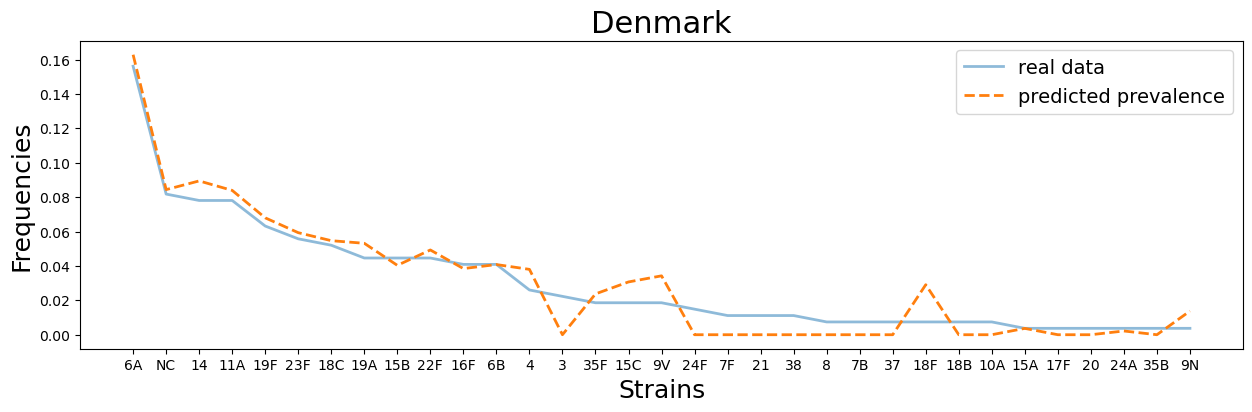

In [10]:
#FINAL TEST by data plot
range_strain = np.linspace(0, strain_number - 1, strain_number)
tick_label = np.array(Denmark.strain)

fig = plt.figure(figsize = (15, 4))
plt.plot(range_strain, Denmark_cases, '-', linewidth = 2, alpha =.5, label = 'real data')
plt.plot(range_strain, solution, '--', linewidth = 2, label = 'predicted prevalence')

plt.xlabel('Strains', fontsize = 18)
plt.ylabel('Frequencies', fontsize = 18)

plt.title('Denmark', fontsize = 22)

plt.xticks(range_strain, labels = tick_label)
plt.legend(fontsize = 14)
plt.show()